In [3]:
## from michigan.fusion import Fusion
from michigan.michigan import MichiganProcessing
import glob
import os
from nansat import Nansat, Domain
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

In [5]:
data_list_M = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/LAC_OC_MUMM/*')))
data_list_F = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/*.nc')))

=>michigan.grd<=


<IPython.core.display.Javascript object>


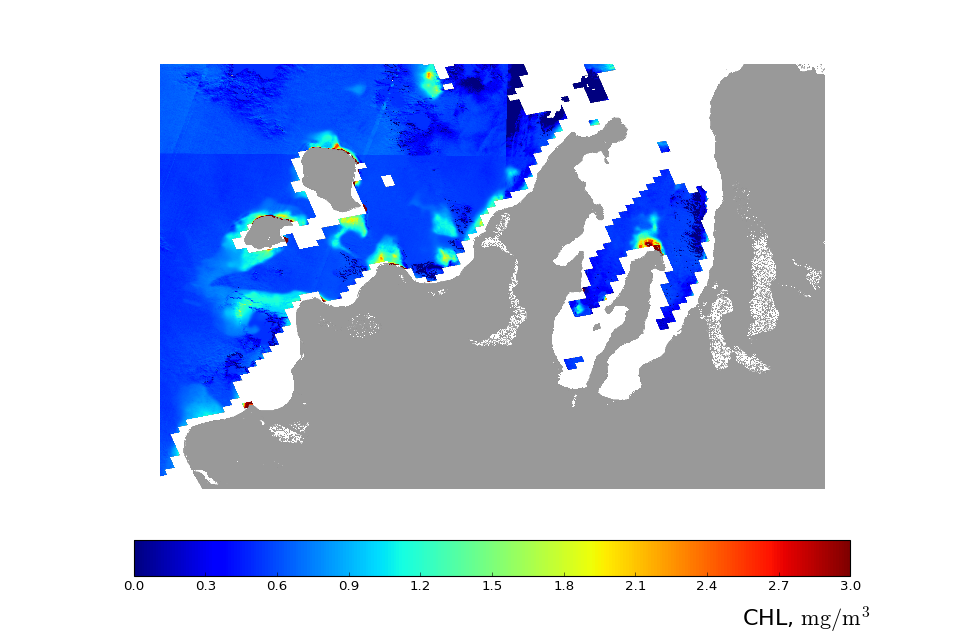

<IPython.core.display.Javascript object>


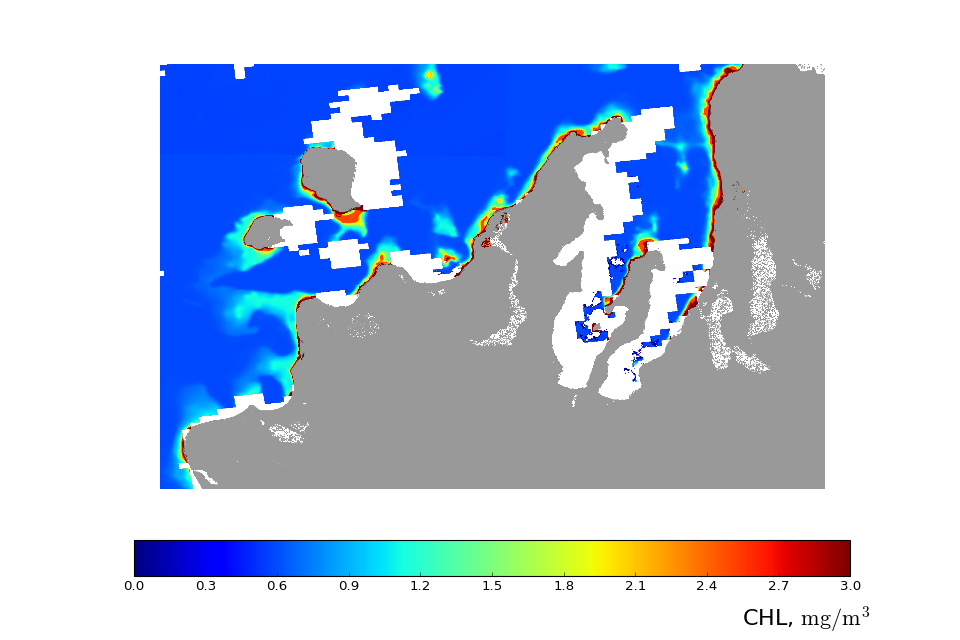

<IPython.core.display.Javascript object>


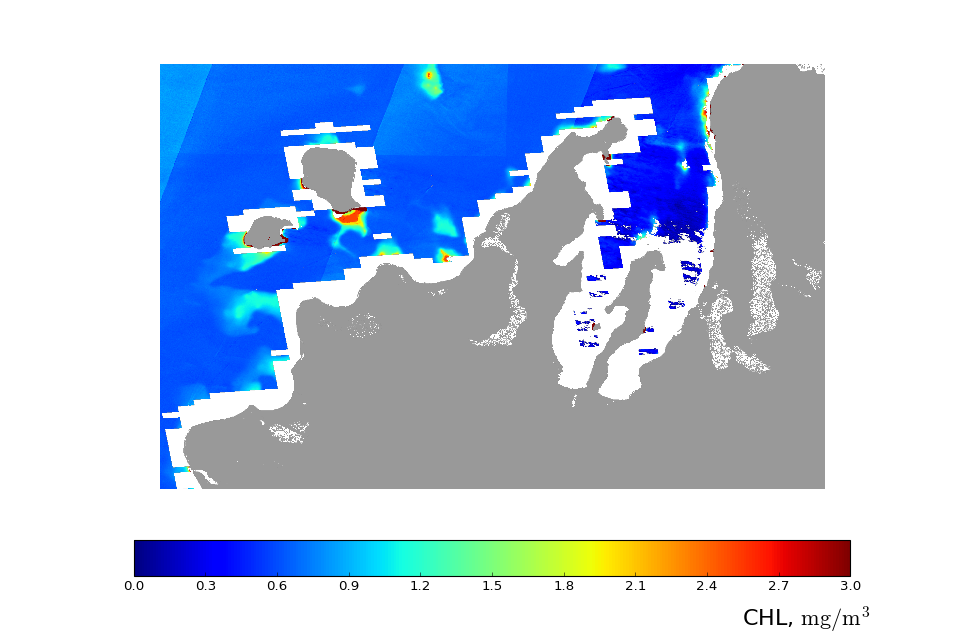

<IPython.core.display.Javascript object>


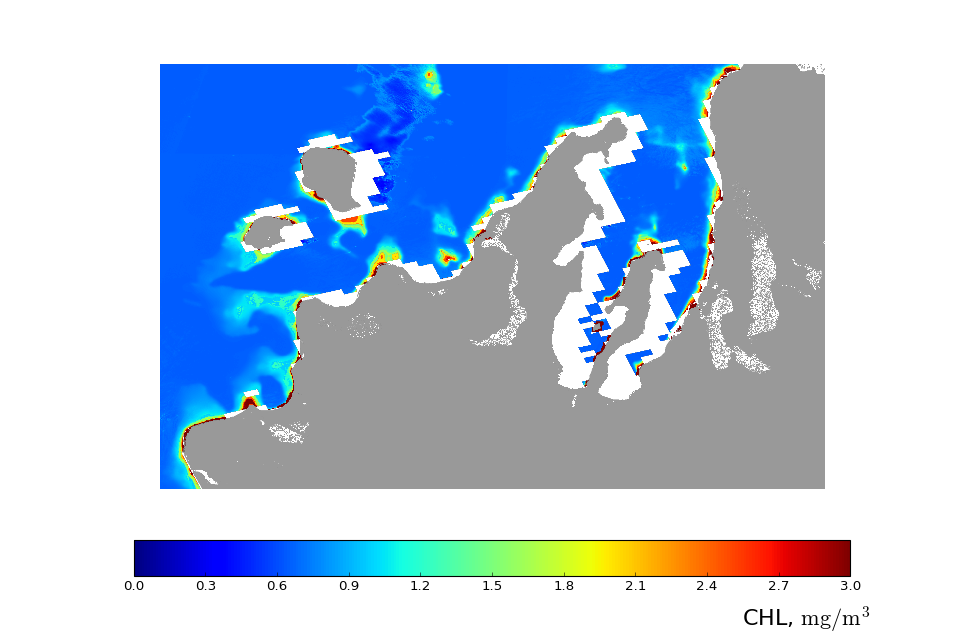

<IPython.core.display.Javascript object>


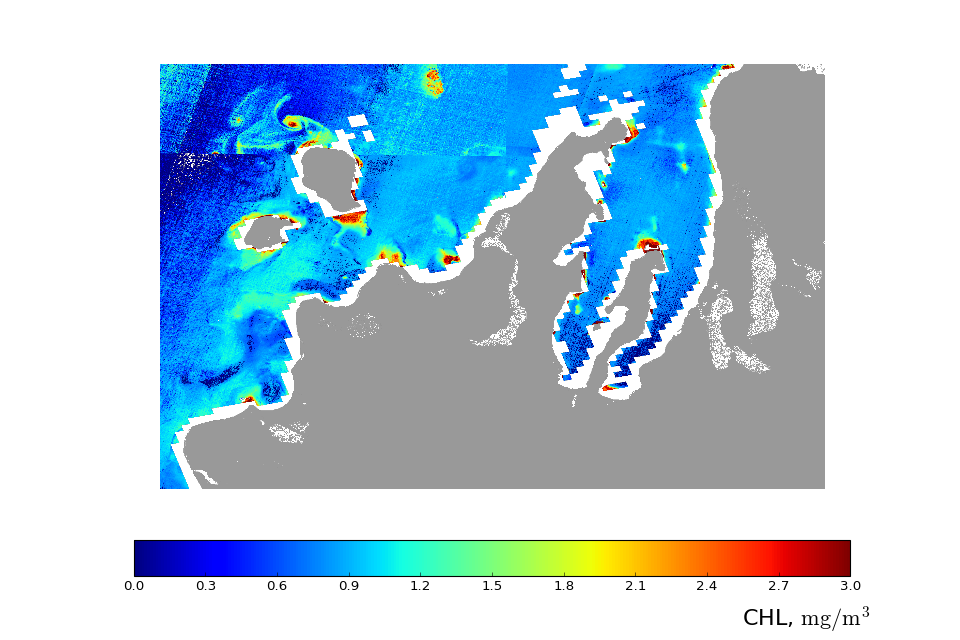

In [32]:
dom = Domain('+proj=latlong +datum=WGS84 +eellps=WGS84 +no_defs', '-lle -86.3 44.6 -85.2 45.3 -ts 122 78')
mask = Nansat('requirements/michigan_lld.grd')
mask.reproject(MichiganProcessing.sbd_dom)

for el in range(len(data_list_M)):
    m = Nansat(data_list_M[el])
    h = np.where(mask[1] >= 0, np.nan, np.float32(mask[1]) * -1)
    land_mask = np.where(np.isfinite(h), np.nan, np.array(1))
    modis_negative_mask = np.where(m['Rrs_412'] < 0, 1, np.nan)
    modis_negative_mask[m['Rrs_678'] < 0] = 1
    
    f = Nansat(data_list_F[el])
    cpa = f['chl']
    cpa[modis_negative_mask == 1] = np.nan

    
    show_it(cpa, land_mask=land_mask,limits=(0.0, 3.),size=(12,8))

In [31]:
def show_it(obj, name='no name', color='jet', limits=(0, None), 
            z10='off', size=(9, 6), coord_grid='off', land_mask=None,
           f_name=None, save_path=None):

    plt.figure(figsize=size)
    obj = np.array(obj)
    #obj[obj > limits[1]] = np.nan
    #obj[obj < limits[0]] = np.nan
    
    plt.imshow(obj, clim=limits, cmap=color)
    clb = plt.colorbar(orientation='horizontal', fraction=0.07, pad=0.1)
    #clb.ax.set_title('This is a title', fontsize=18)
    #clb.ax.tick_params(labelsize=18) 
    #clb.ax.set_ylabel('# of contacts', rotation=270)

    # plt.title(name, y=1.08, fontsize=16)
    plt.tick_params(labelsize=14)
    #plt.text(1450, 1150, '%s' % get_date(os.path.split(f_name)[-1]), fontsize=20, 
    #        bbox={'facecolor':'white', 'pad':5})
    plt.text(1710, 1650, 'CHL, ' + r'$\mathrm{mg/m^{3}}$', fontsize=20)
    
    # plt.text(1310, 1650, 'Bottom depth, meters', fontsize=20)
    if land_mask is not None:
        plt.imshow(land_mask, cmap='Set1_r',)

    if coord_grid == 'on':
        y = np.arange(0.0, 1248.0, 1248.0 / 7)
        y_labels = [str(n) + ' N' for n in np.arange(45.3, 44.5, -0.1)]
        x = np.arange(0.0, 1952.0, 1952.0 / 6)
        x_labels = [str(w) + ' W' for w in np.arange(86.3, 85.2, -0.2)]
        plt.yticks(y, y_labels)
        plt.xticks(x, x_labels)
        # plt.xlabel('west')
        # plt.ylabel('north')
        plt.tick_params(axis='both', which='major', labelsize=18)
        plt.tick_params(axis='both', which='minor', labelsize=8)

    # black field is area which depth less than 10 meters
    # if z10 == 'on': plt.imshow(h_10m, cmap='gray')
    # plt.imshow(h_mask, cmap='Dark2')
    plt.axis('off')
    plt.grid(color='black')        
    plt.show()

In [2]:
## mfile = '/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/LAC_OC_MUMM/A2016129182500.nc_mumm_reprojected.nc'
sfile = '/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/sentinel2/L2A/S2A_USER_PRD_MSIL2A_PDMC_20160509T203209_R126_V20160506T164935_20160506T164935.SAFE_reprojected.nc'
qq
fuse = Fusion(mfile, sfile)
n_lores, n_hires = fuse.fusion(m_wavelengths='1x1km_bands')
n_hires.export('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_129_mumml2_s2l2.nc')

NameError: name 'Fusion' is not defined

In [ ]:
## n_hires.export('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_mumml2_s2l2.nc')

In [14]:
fused_data = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/fused_data/*')))
osw_path = '/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/'
deep_path = '/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali/'
for el in fused_data:
    print os.path.split(el)[-1]
    cpa_proc = MichiganProcessing(el)
    cpa_osw = cpa_proc.boreali_processing()
    cpa_deep = cpa_proc.boreali_processing(osw_mod='off')
    cpa_osw.export(os.path.join(osw_path, os.path.split(el)[-1] + '_cpa_osw.nc'))
    cpa_deep.export(os.path.join(deep_path, os.path.split(el)[-1] + '_cpa_deep.nc'))



20160509_129_mumml2_s2l2.nc
=>michigan.grd<=
wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrs_


/home/artemm/miniconda/envs/niersc/lib/python2.7/site-packages/boreali/boreali.py:295: RuntimeWarning: invalid value encountered in less
  negativePixels = rrsw.min(axis=0) < 0


Pixels x bands to process:  (1202445, 6)
launch shallow
launch shallow
launch shallow
launch shallow
spent:  713.218447924
=>michigan.grd<=
wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrsw_
Pixels x bands to process:  (1202445, 6)
launch deep
launch deep
launch deep
launch deep
spent:  516.989969969
20160705_187_mumml2_s2l2.nc
=>michigan.grd<=
wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrs_
Pixels x bands to process:  (1171894, 6)
launch shallow
launch shallow
launch shallow
launch shallow
spent:  762.536082029
=>michigan.grd<=
wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrsw_
Pixels x bands to process:  (1171894, 6)
launch deep
launch deep
launch deep
launch deep
spent:  569.956476927
20160726_208_mumml2_s2l2.nc
=>michigan.grd<=
wavelen [412.0, 443.0, 488.0, 531.0, 645.0, 678.0]
R Name is  Rrs_
Pixels x bands to process:  (1125788, 6)
launch shallow
launch shallow
launch shallow
launch shallow
spent:  711.583071947
=>michigan.grd<

In [333]:
m = MichiganProcessing('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160705_187_mumml2_s2l2.nc')
mask = m.get_land_mask()

=>michigan.grd<=


NameError: name 'Domain' is not defined

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160509_129_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


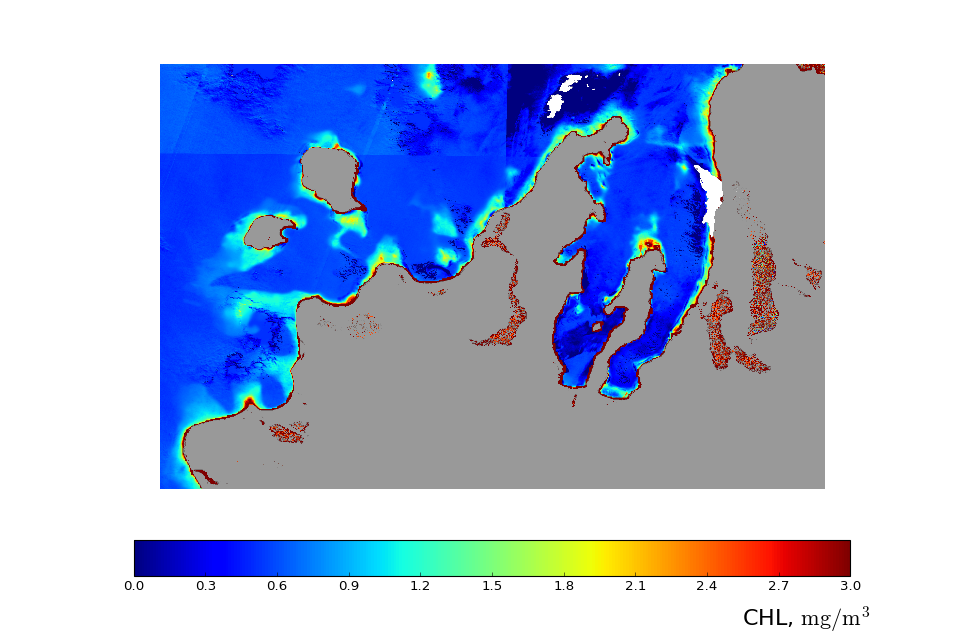

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160705_187_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


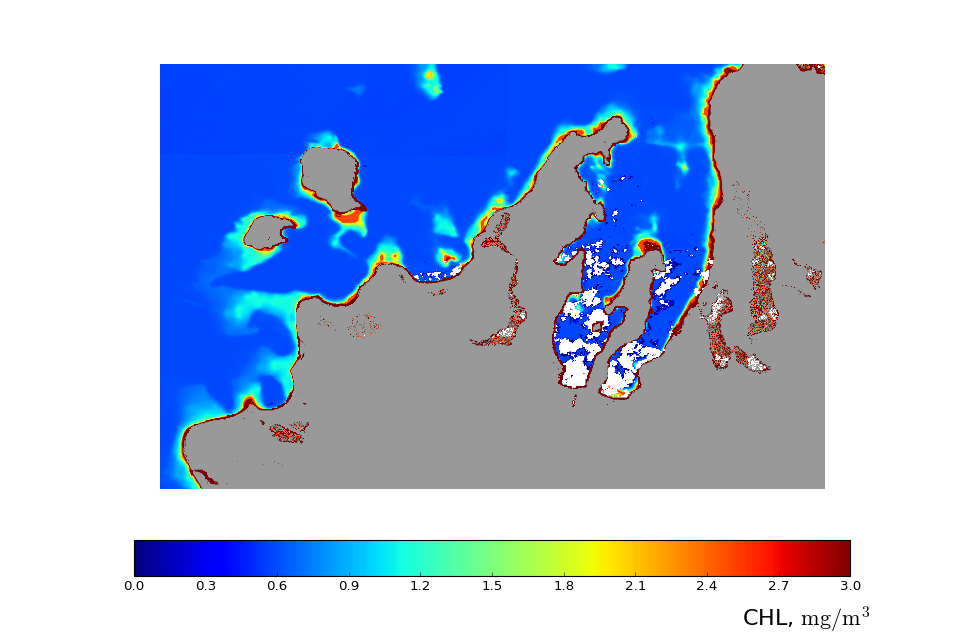

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160726_208_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


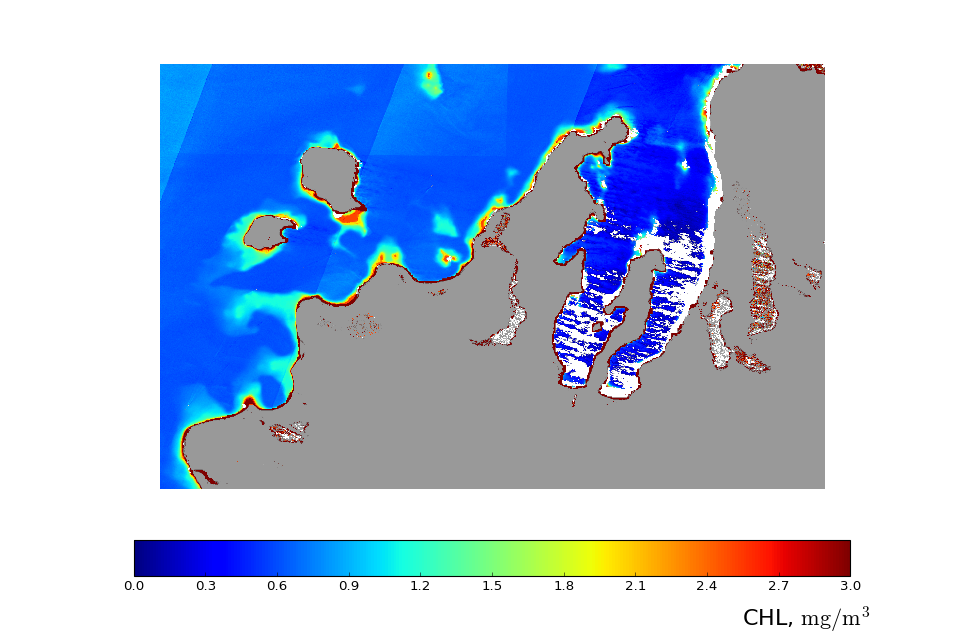

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160815_227_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


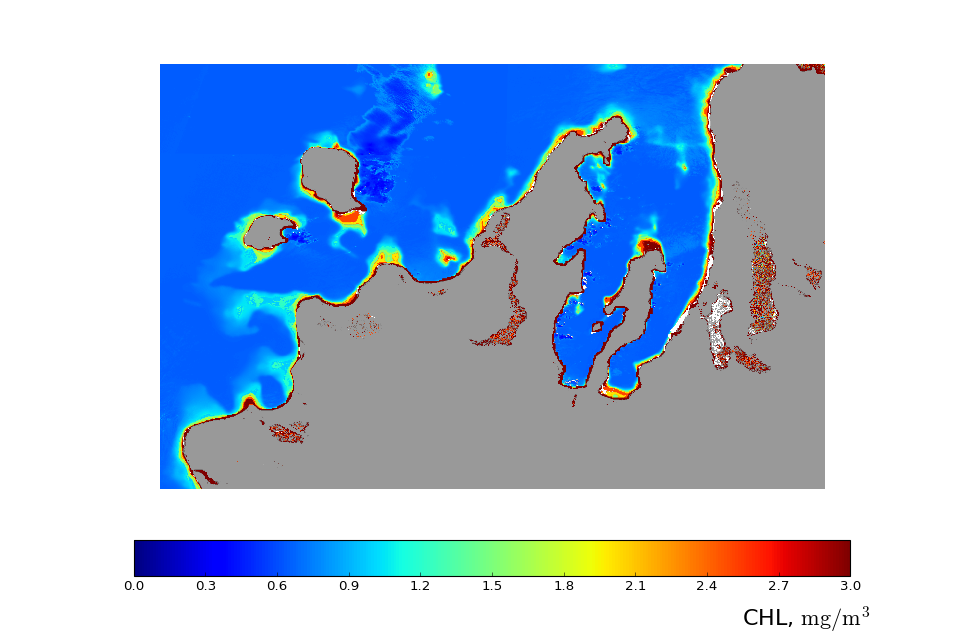

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160904_248_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


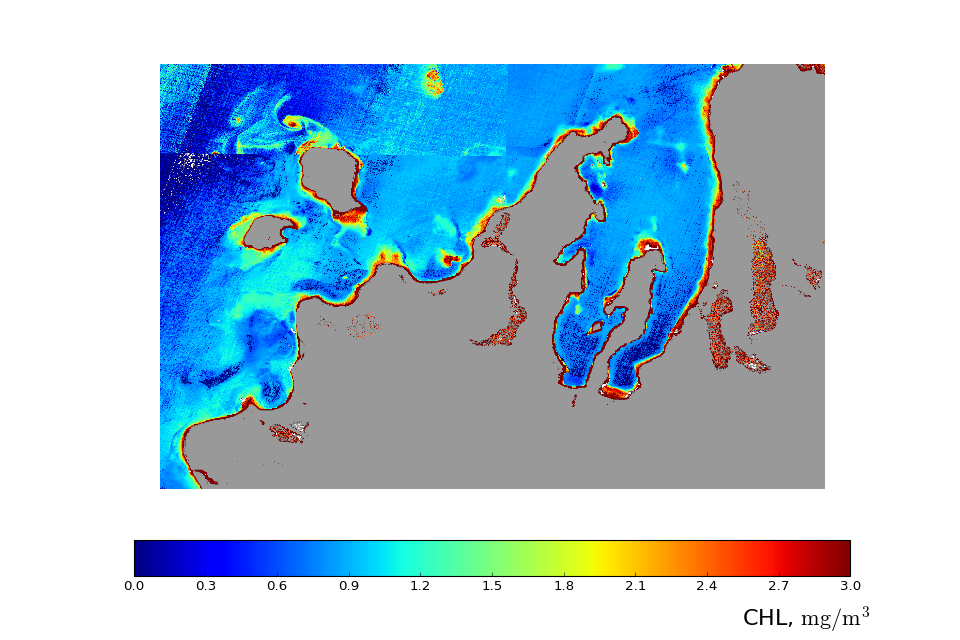

In [569]:
%matplotlib nbagg
cpa_path_list_osw = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/*.nc')))
cpa_path_list_deep = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali/*')))
for el in range(0, len(cpa_path_list_osw)):
    osw = Nansat(cpa_path_list_osw[el])
    print cpa_path_list_osw[el]
    deep = Nansat(cpa_path_list_deep[el])
    show_it(
        osw['chl'], limits=(0.0, 3.), name=os.path.split(cpa_path_list_osw[el])[-1], 
        size=(12,8), land_mask=mask, coord_grid='on', f_name=cpa_path_list_osw[el],
    )

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160509_129_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


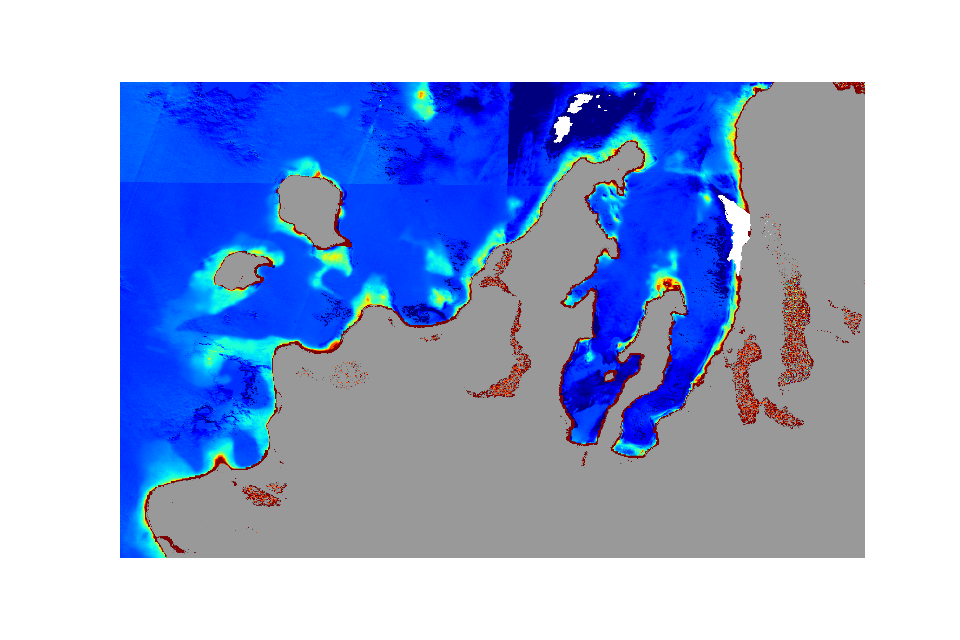

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160705_187_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


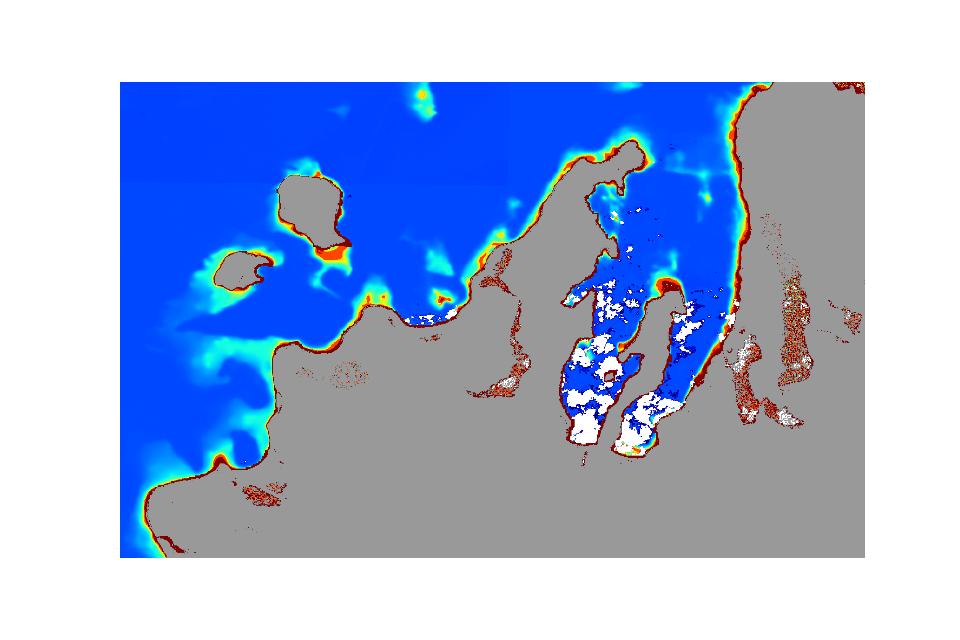

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160726_208_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


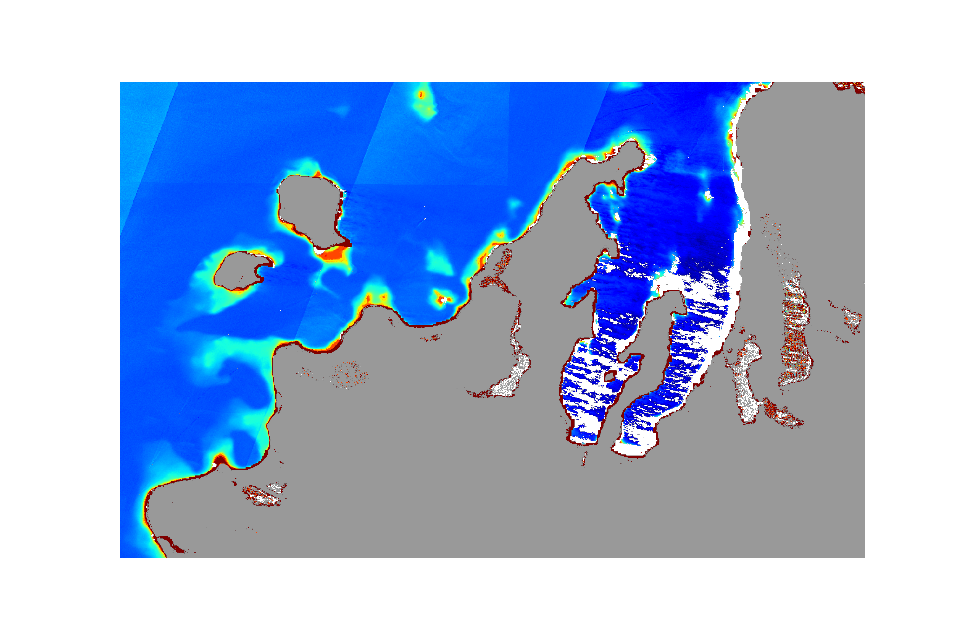

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160815_227_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


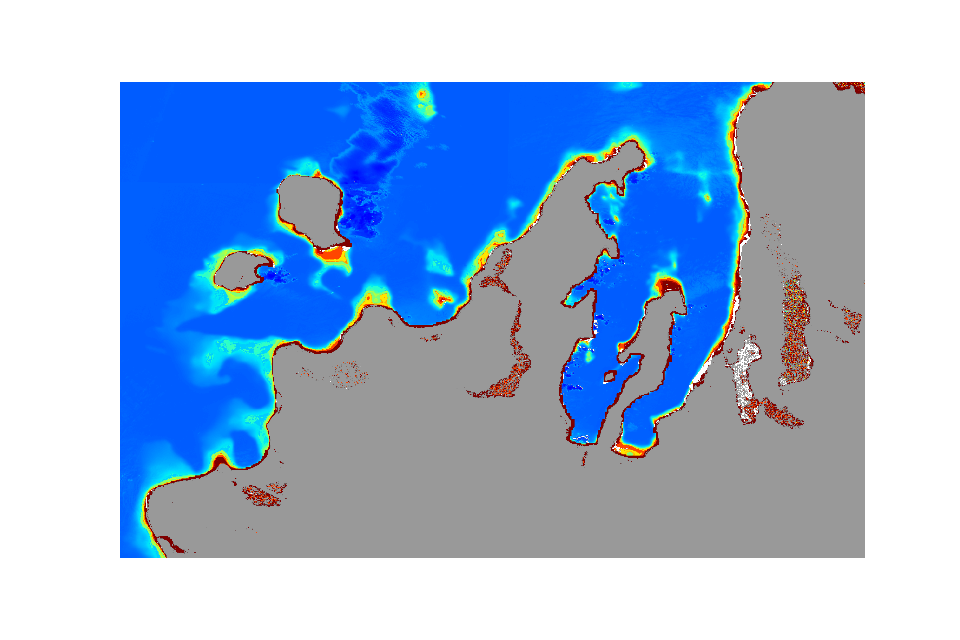

/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/20160904_248_mumml2_s2l2.nc_cpa_osw.nc


<IPython.core.display.Javascript object>


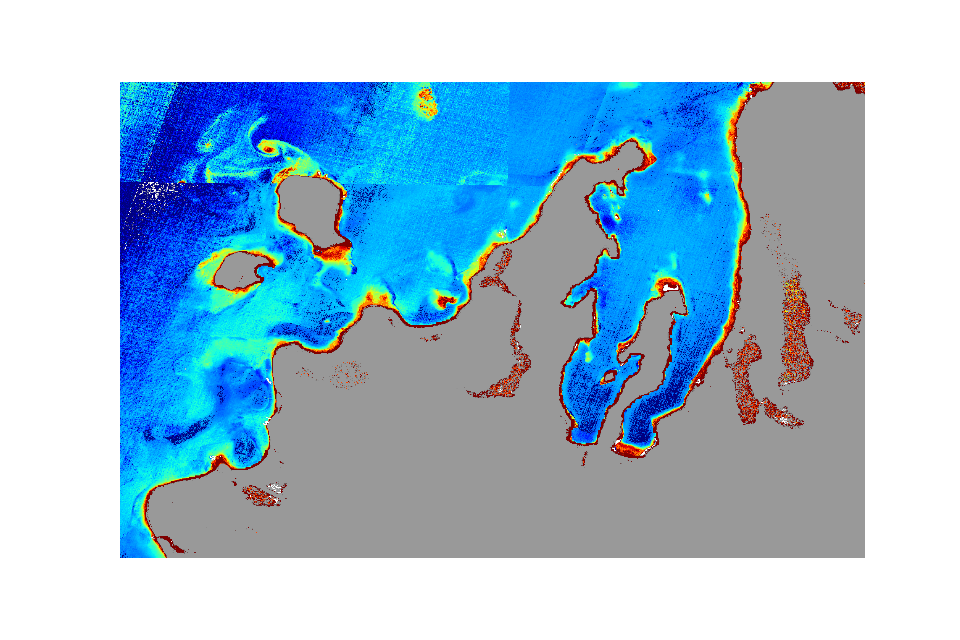

In [560]:
%matplotlib nbagg
cpa_path_list_osw = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali_osw/*.nc')))
cpa_path_list_deep = sorted(list(glob.glob('/nfs0/data_ocolor/michigan/michigan1617/cpa/fused_mumm/boreali/*')))
for el in range(0, len(cpa_path_list_osw)):
    osw = Nansat(cpa_path_list_osw[el])
    print cpa_path_list_osw[el]
    deep = Nansat(cpa_path_list_deep[el])
    show_it(
        osw['chl'], limits=(0.0, 3.), name=os.path.split(cpa_path_list_osw[el])[-1], 
        size=(12,8), land_mask=mask, f_name=cpa_path_list_osw[el],
    )

=>michigan.grd<=


<IPython.core.display.Javascript object>


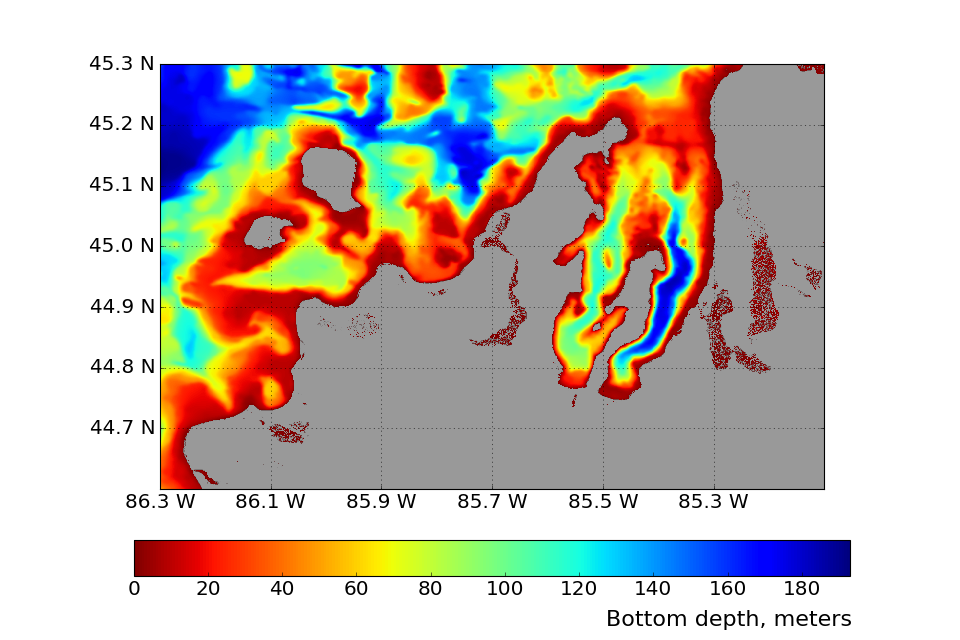

In [529]:
base = MichiganProcessing('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_129_mumml2_s2l2.nc')
bottom = base.get_bottom()
show_it(bottom, name='Bottom depth', size=(12,8), coord_grid='on', land_mask=mask, color='jet_r')

In [11]:
def get_date(f_name):
    # dates formatting for fused images
    '20160705_187_mumml2_s2l2.nc'
    d = f_name.split('_')[0]
    fd = d[6:8] + '-' + d[4:6] + '-' + d[0:4]
    return fd

# get_date
('20160705_187_mumml2_s2l2.nc')

In [480]:
n = Nansat('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160726_208_mumml2_s2l2.nc')
n.write_figure('20160726_208_mumml2_s2l2_rgb.png',
bands=[6,4,2], clim = [[0.0001,0.0001,0.0001],[0.0001,0.04,0.018]])

In [500]:
n = Nansat('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160705_187_mumml2_s2l2.nc')
mask_lut = {1 : [128,128,128],
            2 : [255,255,255]}
bands = ['Rrs_443', 'Rrs_531', 'Rrs_678']
for b in bands:
    ccc = n[b]
    ccc[np.isnan(c) == True] = 2
    n.add_band(ccc, parameters={'name':b})
n.write_figure('test.png',
                   bands=['Rrs_678_000','Rrs_531_000','Rrs_443_000'], 
                   clim = [[0.0004,0.0044,0.00475],[0.009,0.0057,0.0054]], 
                   mask_array=mask,
                   mask_lut=mask_lut)
               #bands=[6,4,2], clim = [[0.0006,0.0001,0.0035],[0.0012,0.0014,0.008]])


In [ ]:
n = Nansat('/nfs0/data_ocolor/michigan/michigan1617/clear_data/')

<IPython.core.display.Javascript object>


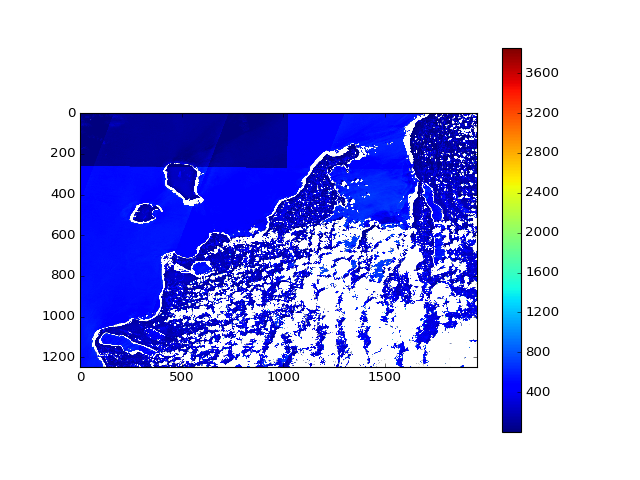

In [484]:
nn = Nansat('/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/sentinel2/L2A/.SAFE_reprojected.nc')
c = nn[2]
c[nn[2] > 700] = np.nan
plt.figure()
plt.imshow(c)
plt.colorbar()
plt.show()

In [481]:
# n = Nansat('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160509_129_mumml2_s2l2.nc')   750
# mask_lut = {1 : [128,128,128],
#             2 : [255,255,255]}

# n.write_figure('test.png',
# bands=[6,4,2], clim = [[0.0001,0.003,0.003],[0.009,0.009,0.008]], 
#                              mask_array=mask,
#                mask_lut=mask_lut)
#                #bands=[6,4,2], clim = [[0.0006,0.0001,0.0035],[0.0012,0.0014,0.008]])

# n.write_figure('test.png', 560
#                bands=['Rrs_678_000','Rrs_531_000','Rrs_443_000'],
#                clim = [[0.0001,0.0035,0.004],[0.005,0.0074,0.0064]], 
#                mask_array=mask,
#                mask_lut=mask_lut)
#                #bands=[6,4,2], clim = [[0.0006,0.0001,0.0035],[0.0012,0.0014,0.008]])
    
# n.write_figure('test.png', 700
#                bands=['Rrs_678_000','Rrs_531_000','Rrs_443_000'],
#                clim = [[0.0001,0.0046,0.004],[0.008,0.0052,0.0084]], 
#                mask_array=mask,
#                mask_lut=mask_lut)
#                #bands=[6,4,2], clim = [[0.0006,0.0001,0.0035],[0.0012,0.0014,0.008]])

<IPython.core.display.Javascript object>


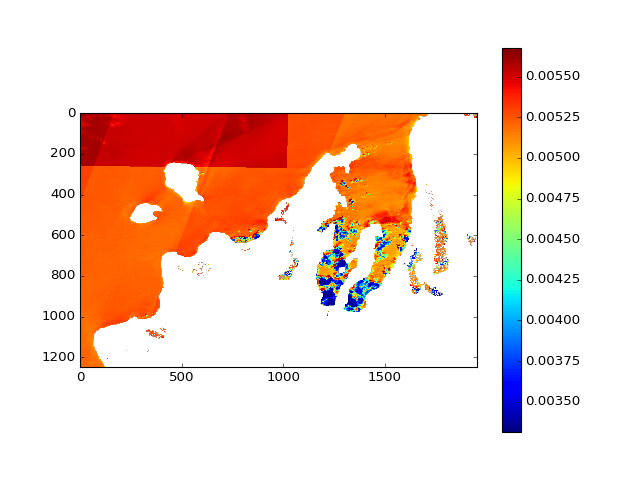

(0.0033140156766939873, 0.0056757235003123763)


In [489]:
n = Nansat('/nfs0/data_ocolor/michigan/michigan1617/fused_data/20160705_187_mumml2_s2l2.nc')
a = n['Rrs_443']
plt.figure()
plt.imshow(a)
plt.colorbar()
plt.show()
print(np.nanmin(a), np.nanmax(a))

In [508]:
n = Nansat('/nfs0/data_ocolor/michigan/michigan1617/reprojected_data/MODISa/LAC_OC_MUMM/A2016248183000.nc_mumm_reprojected.nc')
n.write_figure('test_m.png',
                bands=['Rrs_678','Rrs_531','Rrs_443'],
                clim = [[0.001,0.001,0.001],[0.012,0.020,0.015]], 
                mask_array=mask,
                mask_lut=mask_lut)

<IPython.core.display.Javascript object>


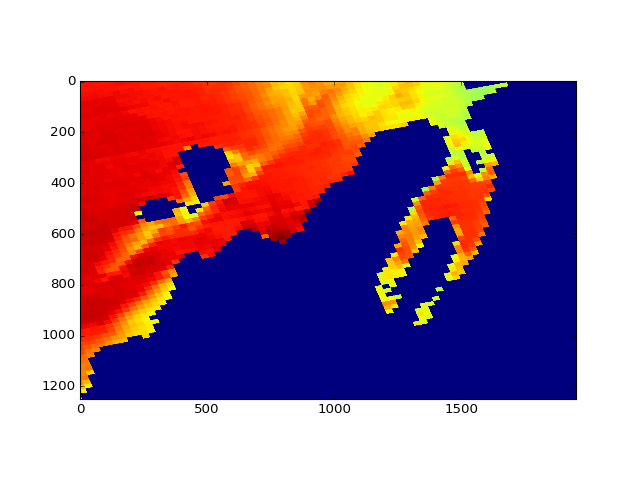

In [21]:
n = Nansat(data_list_M[0])
plt.figure()
plt.imshow(n['Rrs_412'])
plt.show()